# **Fashion MINST Classification Project**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split

## **Importing the data**

In [2]:
train_data = pd.read_csv('./data/fashion-mnist_train.csv')
test_data = pd.read_csv('./data/fashion-mnist_test.csv')

print(f'Train Dataset shape: {train_data.shape}')
print(f'Test Dataset shape: {test_data.shape}')

Train Dataset shape: (60000, 785)
Test Dataset shape: (10000, 785)


In [3]:
# Training data
X_train = train_data.drop('label', axis = 1)/255
y_train = train_data['label']

# Testing data
X_test = test_data.drop('label', axis = 1)/255
y_test = test_data['label']

print(f'Features train shape: {X_train.shape}')
print(f'Target train shape: {y_train.shape}')
print(f'\nFeatures test shape: {X_test.shape}')
print(f'Target test shape: {y_test.shape}')

Features train shape: (60000, 784)
Target train shape: (60000,)

Features test shape: (10000, 784)
Target test shape: (10000,)


### Exploring the images

In [4]:
# Image labels dictionary
img_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

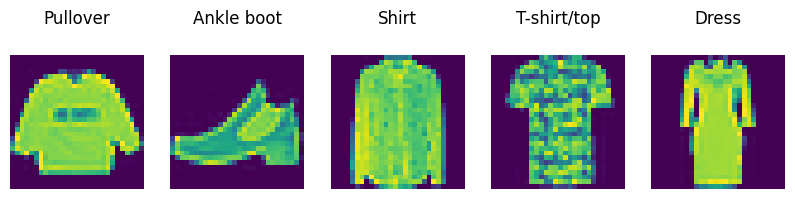

In [5]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for i in range(5):
    axes[i].matshow(X_train.iloc[i].values.reshape(28, 28))
    axes[i].set_title(img_labels[y_train.iloc[i]])
    axes[i].axis('off')

# Show the plot
plt.show()

## **ANN 1:**
- 2 Hidden Layers
- Learning rate 0.001

### ANN 1 - Training the Model

In [6]:

model_1 = keras.Sequential([
  keras.layers.Dense(256, input_shape=(784,), activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

training_history = model_1.fit(X_train, y_train, epochs=50, batch_size = 32, validation_split=0.1)


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7761 - loss: 0.6164 - val_accuracy: 0.8298 - val_loss: 0.4806
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8631 - loss: 0.3739 - val_accuracy: 0.8650 - val_loss: 0.3744
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.3305 - val_accuracy: 0.8685 - val_loss: 0.3671
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8855 - loss: 0.3059 - val_accuracy: 0.8785 - val_loss: 0.3367
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8912 - loss: 0.2898 - val_accuracy: 0.8748 - val_loss: 0.3458
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9001 - loss: 0.2652 - val_accuracy: 0.8818 - val_loss: 0.3256
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9066 - loss: 0.2538 - val_accuracy: 0.8705 - val_loss: 0.3613
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9072 - loss: 0.2472 - val_accurac

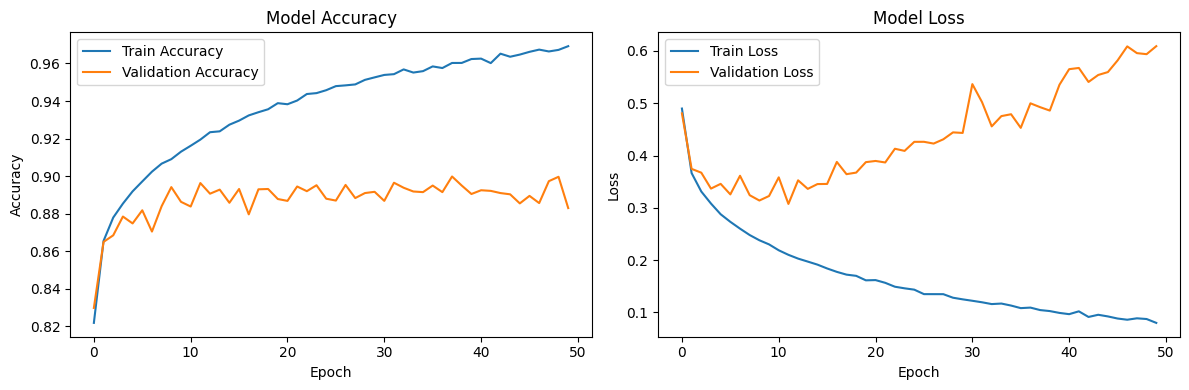

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Training Loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

With this plot we can observe clear signs of overfitting in the ANN. Approximately after the 10th epoch, the accuracy in the validation set stops improving and enters a plateau, while the Loss stops decreasing and starts increasing drastically.

### ANN 1 - Model evaluation

In [8]:
model_1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8887 - loss: 0.5528


[0.5632163882255554, 0.8916000127792358]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


Text(95.72222222222221, 0.5, 'Truth')

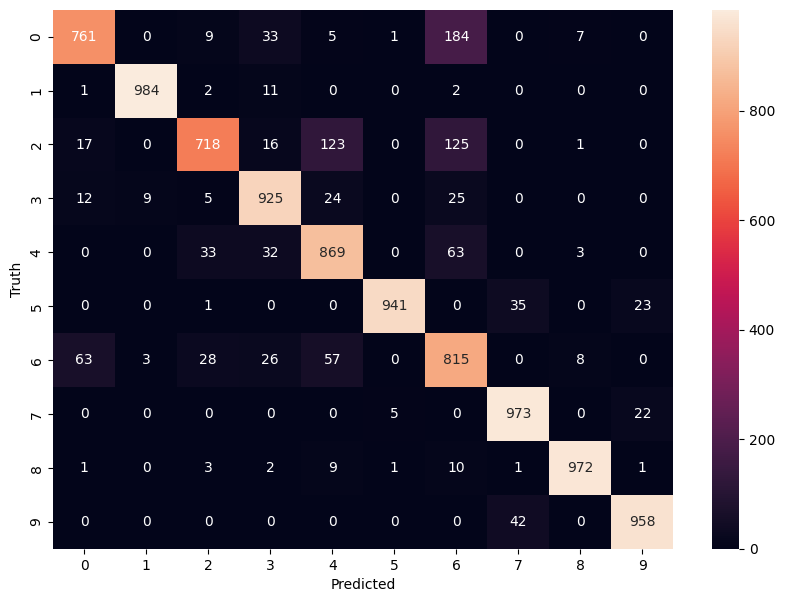

In [9]:
# Make predictions
y_predicted = model_1.predict(X_test)

# Convert predicted probabilities to labels
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### ANN 1 - Exploring predictions

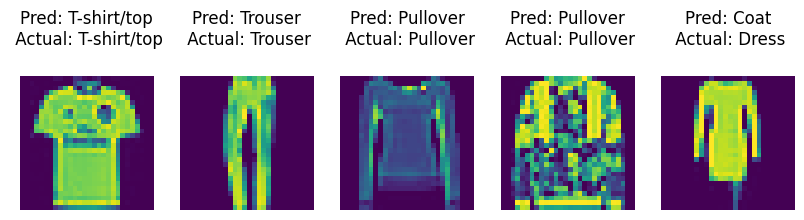

In [14]:
# Plot the first 5 images with predicted labels as titles
plt.figure(figsize=(10, 5))

for i in range(5):
    plt.subplot(1, 5, i + 1)  # Create a grid with 1 row and 5 columns
    plt.matshow(X_test.iloc[i].values.reshape(28, 28), fignum=False)  # Use X_test[i].reshape(28, 28) if X_test is a NumPy array
    plt.title(f"Pred: {img_labels[y_predicted_labels[i]]}\n Actual: {img_labels[y_test.iloc[i]]}")
    plt.axis('off')  # Hide the axes for a cleaner look

plt.show()

## **ANN 2:**
- 3 Hidden Layers
- Learning rate 0.001
- 20 epochs

### ANN 2 - Training the Model

In [17]:
model_2 = keras.Sequential([
  keras.layers.Dense(256, input_shape=(784,), activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

training_history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size = 32, validation_split=0.1)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7723 - loss: 0.6239 - val_accuracy: 0.8390 - val_loss: 0.4382
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8624 - loss: 0.3773 - val_accuracy: 0.8728 - val_loss: 0.3486
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8747 - loss: 0.3387 - val_accuracy: 0.8778 - val_loss: 0.3484
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8830 - loss: 0.3122 - val_accuracy: 0.8838 - val_loss: 0.3320
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8853 - loss: 0.3026 - val_accuracy: 0.8792 - val_loss: 0.3356
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8948 - loss: 0.2815 - val_accuracy: 0.8838 - val_loss: 0.3215
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9020 - loss: 0.2612 - val_accuracy: 0.8828 - val_loss: 0.3327
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9054 - loss: 0.2519 - val_accurac

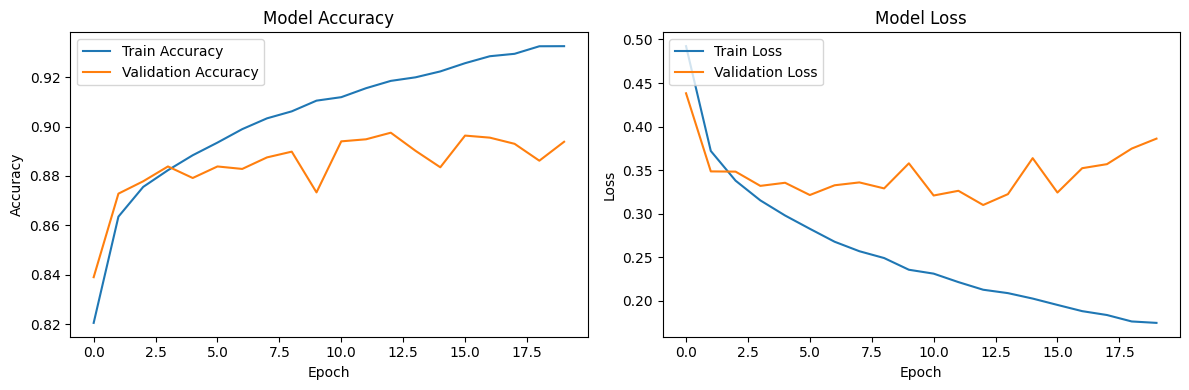

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(training_history_2.history['accuracy'], label='Train Accuracy')
plt.plot(training_history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Training Loss
plt.subplot(1, 2, 2)
plt.plot(training_history_2.history['loss'], label='Train Loss')
plt.plot(training_history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### ANN 2 - Model evaluation

In [20]:
model_2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8852 - loss: 0.3588


[0.3607402443885803, 0.8906000256538391]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


Text(95.72222222222221, 0.5, 'Truth')

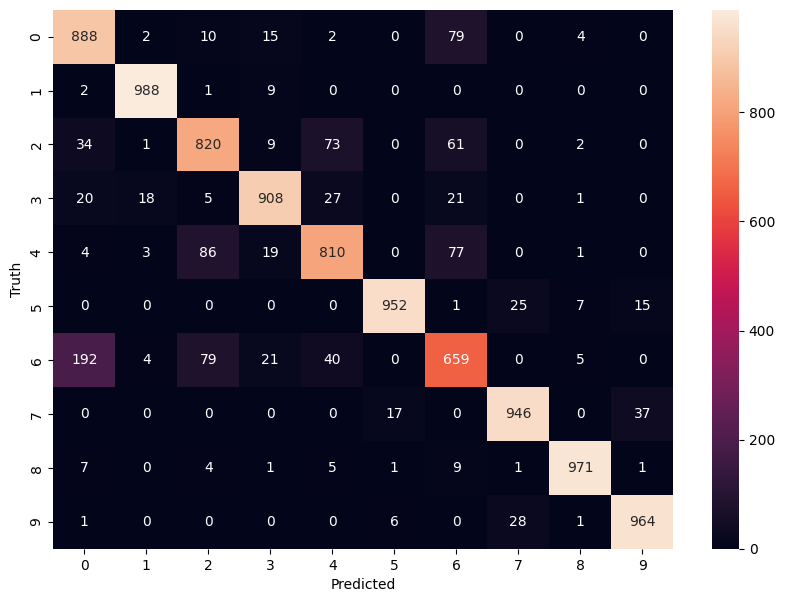

In [19]:
# Make predictions
y_predicted_2 = model_2.predict(X_test)

# Convert predicted probabilities to labels
y_predicted_labels_2 = [np.argmax(i) for i in y_predicted_2]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels_2)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **ANN 3:**
- 3 Hidden Layers
- Learning rate 0.001
- Use Dropout rate to prevent overfitting
- Add batch normalization
- Add early stop. This will stop the training when there are signs of overfitting.
- Use reduction of learning rate when accuracy encounters a plateau.

In [23]:
# Model architecture with Dropout, Batch Normalization, and Early Stopping
model_3 = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    keras.layers.BatchNormalization(),  # Add batch normalization
    keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),  # Add batch normalization
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),  # Add batch normalization
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model with Adam optimizer and learning rate scheduler
model_3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model with validation split and callbacks
training_history_3 = model_3.fit(
    X_train, y_train,
    epochs=50,  # Increased epochs with early stopping
    batch_size=32,
    validation_split=0.1,  # Keep 10% of data for validation
    callbacks=[early_stopping, reduce_lr]  # Apply early stopping and reduce learning rate on plateau
)


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7374 - loss: 0.7671 - val_accuracy: 0.8352 - val_loss: 0.4531 - learning_rate: 0.0010
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8239 - loss: 0.4854 - val_accuracy: 0.8455 - val_loss: 0.4360 - learning_rate: 0.0010
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8368 - loss: 0.4597 - val_accuracy: 0.8572 - val_loss: 0.3995 - learning_rate: 0.0010
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8476 - loss: 0.4295 - val_accuracy: 0.8703 - val_loss: 0.3639 - learning_rate: 0.0010
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8489 - loss: 0.4205 - val_accuracy: 0.8503 - val_loss: 0.4115 - learning_rate: 0.0010
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8586 - loss: 0.3997 - val_accuracy: 0.8632 - val_loss: 0.3801 - learning_rate: 0.0010
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8593 - loss: 0.3843

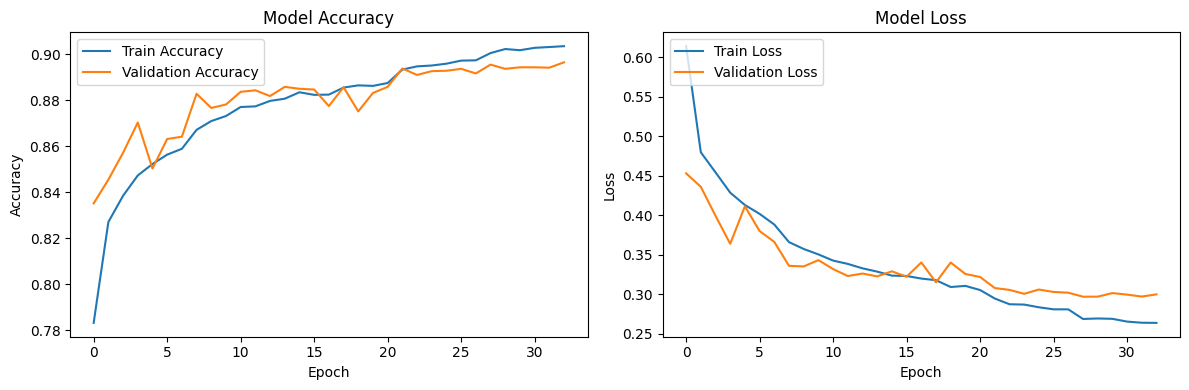

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(training_history_3.history['accuracy'], label='Train Accuracy')
plt.plot(training_history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Training Loss
plt.subplot(1, 2, 2)
plt.plot(training_history_3.history['loss'], label='Train Loss')
plt.plot(training_history_3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### ANN 3 - Model evaluation

In [25]:
model_3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8927 - loss: 0.2943


[0.29012250900268555, 0.8950999975204468]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


Text(95.72222222222221, 0.5, 'Truth')

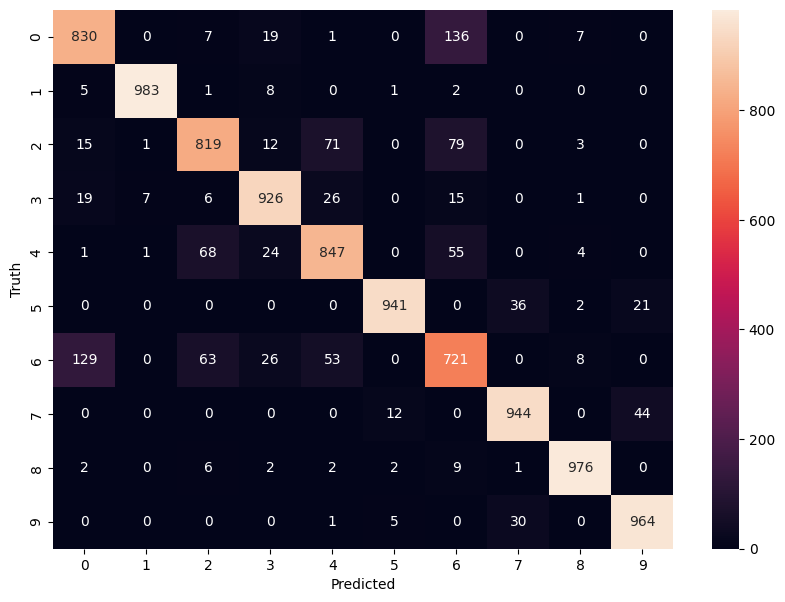

In [26]:
# Make predictions
y_predicted_3 = model_3.predict(X_test)

# Convert predicted probabilities to labels
y_predicted_labels_3 = [np.argmax(i) for i in y_predicted_3]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels_3)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### ANN 3 - Exploring predictions

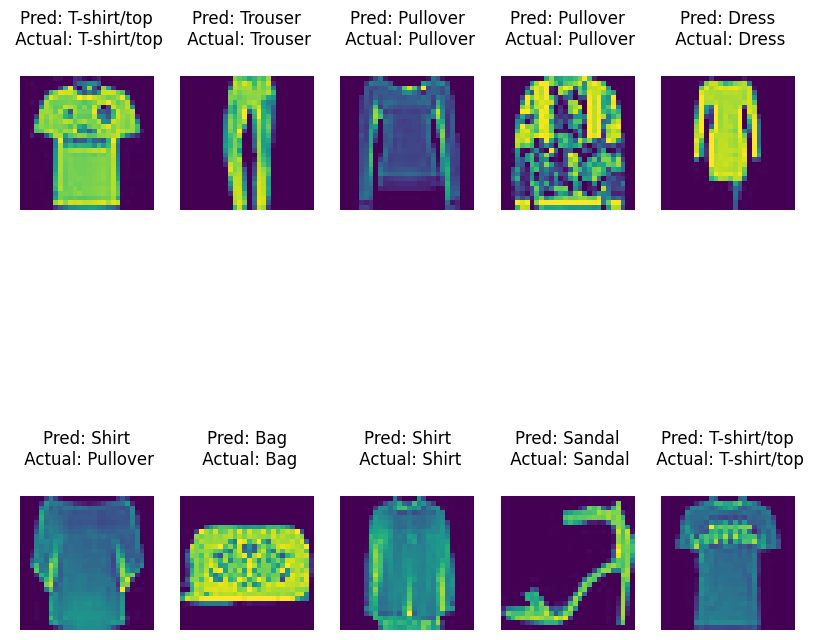

In [30]:
# Plot the first 5 images with predicted labels as titles
plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a grid with 1 row and 5 columns
    plt.matshow(X_test.iloc[i].values.reshape(28, 28), fignum=False)  # Use X_test[i].reshape(28, 28) if X_test is a NumPy array
    plt.title(f"Pred: {img_labels[y_predicted_labels_3[i]]}\n Actual: {img_labels[y_test.iloc[i]]}")
    plt.axis('off')  # Hide the axes for a cleaner look

plt.show()

## **Conclusion:**

Three Artificial Neural Networks (ANNs) with different architectures were trained to perform image classification, and their performance was evaluated based on accuracy and loss.

- ANN 1: The simplest architecture with two hidden layers showed early signs of overfitting, with validation accuracy stagnating and loss increasing after epoch 10. Despite this, it achieved a reasonable accuracy of 88.87%.
- ANN 2: Adding a third hidden layer reduced the validation loss but still exhibited overfitting after epoch 10, achieving an accuracy of 88.52%. The additional complexity did not significantly improve performance compared to ANN 1.
- ANN 3: By introducing batch normalization and dropout layers, the third model mitigated overfitting and continued to improve both validation accuracy and loss throughout the training process. This model achieved the highest accuracy of 89.27% and the lowest loss (0.2943), demonstrating that these regularization techniques can significantly enhance model generalization.

Overall, the results show that more complex architectures, combined with regularization techniques like batch normalization and dropout, can improve performance in image classification tasks by reducing overfitting and improving generalization to unseen data.